In [344]:
import pandas as pd
import numpy as np

# Graph
import plotly.express as px
import matplotlib.pyplot as plt

# Keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras import callbacks

# sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, average_precision_score

# tf
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from tensorflow.keras.layers import Embedding
from tensorflow.keras.optimizers import SGD

In [365]:
path = r"C:\Users\sonia\Documents\Document\2022-2023\Projet 3I - Deep Learning\dataset_clean.csv"
TARGET = 'Label'
df = pd.read_csv(path)
nombre_de_valeurs = df["Label"].value_counts()
print(nombre_de_valeurs)

1    22506
0     2241
Name: Label, dtype: int64


In [367]:
#Extrait des colonnes a utiliser pour la prédiction, "Label" correspond à la variable cible binaire (0 ou 1).
df = df[['Init_Win_bytes_forward',
'Total Length of Fwd Packets',
'Bwd Header Length',
'Destination Port',
'Subflow Fwd Bytes',
'Packet Length Std',
'Packet Length Variance',
'Bwd Packets/s',
'Average Packet Size',
'Bwd Packet Length Std',
         "Label"]]


#Création de deux ensembles de données, une classe positive (label=1) et une classe négative (label=0).
df_b = df[df['Label']==1]
df_a = df[df['Label']==0]

#Sélection d'un nombre fixe d'instances de la classe positive (pour éviter le déséquilibre) et 
#concatène les deux ensembles de données en un seul dataframe.
df_b= df_b[0:2241]

#Mélange aléatoire
df = pd.concat([df_a, df_b], axis=0)

#Variable cible "y" extraite et transformée en "one-hot encoding" (encodage catégorique) 
#pour être compatible avec la fonction d'activation "sigmoid" du modèle.
df = df.sample(frac=1)


y = df[TARGET]
X = df.drop([TARGET],axis=1)

y = y.to_numpy()
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
y = to_categorical(y)

In [368]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [369]:
X_train = np.reshape(X_train, (X_train.shape[0], 1, X.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X.shape[1]))
print(df["Label"].value_counts())

0    2241
1    2241
Name: Label, dtype: int64


In [370]:
print("Shape of training data:", X_train.shape)
print("Shape of testing data:", X_test.shape)

Shape of training data: (3585, 1, 10)
Shape of testing data: (897, 1, 10)


## Model

In [384]:
model = Sequential()

#0.9342
#model.add(Dense(32, input_shape=(1, 10), activation="relu"))
#model.add(Dense(64, activation="relu"))
#model.add(Dense(128, activation="relu"))
#model.add(Dense(y.shape[1], activation='sigmoid'))
#model.add(Flatten())

#0.9275 avec batch_size=16
model.add(Dense(32, input_shape=(1, 10), activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dense(y.shape[1], activation='sigmoid'))
model.add(Flatten())


#avec des dropout ou des batchnormalization (suivant la courbe d'entraiemnet) si ça améliore le truc

#0.9331
#model.add(Dense(32, input_shape=(1, 10), activation="relu"))
#model.add(Dropout(0.3)) # Ajout de Dropout, pourcentage de neurones à désactiver aléatoirement pendant l'apprentissage
#model.add(Dense(64, activation="relu"))
#model.add(Dropout(0.3)) # Ajout de Dropout
#model.add(Dense(128, activation="relu"))
#model.add(Dense(y.shape[1], activation='sigmoid'))
#model.add(Flatten())

#0.9309
#model.add(Dense(32, input_shape=(1, 10,), activation="relu"))
#model.add(Dense(64, activation="tanh"))
#model.add(Dense(128, activation="relu"))
#model.add(Dense(y.shape[1], activation='sigmoid'))
#model.add(Flatten())


model.compile(loss = 'binary_crossentropy', optimizer = "adam", metrics = ['accuracy'])

model.summary()

Model: "sequential_53"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_173 (Dense)           (None, 1, 32)             352       
                                                                 
 dense_174 (Dense)           (None, 1, 64)             2112      
                                                                 
 dense_175 (Dense)           (None, 1, 128)            8320      
                                                                 
 dense_176 (Dense)           (None, 1, 2)              258       
                                                                 
 flatten_29 (Flatten)        (None, 2)                 0         
                                                                 
Total params: 11,042
Trainable params: 11,042
Non-trainable params: 0
_________________________________________________________________


In [385]:
earlystopping = callbacks.EarlyStopping(monitor ="val_loss", 
                                        mode ="min", 
                                        patience = 3, 
                                        restore_best_weights = True)

history = model.fit(X_train, y_train, 
                    epochs = 25, 
                    batch_size=16,
                    validation_data= (X_test, y_test),
                    callbacks =[earlystopping])
history

Epoch 1/25
225/225 [==============================] - 13s 25ms/step - loss: 0.4237 - accuracy: 0.8033 - val_loss: 0.2832 - val_accuracy: 0.8718
Epoch 2/25
225/225 [==============================] - 4s 18ms/step - loss: 0.2784 - accuracy: 0.8700 - val_loss: 0.2394 - val_accuracy: 0.9130
Epoch 3/25
225/225 [==============================] - 2s 9ms/step - loss: 0.2492 - accuracy: 0.8851 - val_loss: 0.2092 - val_accuracy: 0.9175
Epoch 4/25
225/225 [==============================] - 2s 9ms/step - loss: 0.2196 - accuracy: 0.9004 - val_loss: 0.1974 - val_accuracy: 0.9142
Epoch 5/25
225/225 [==============================] - 2s 9ms/step - loss: 0.2055 - accuracy: 0.9110 - val_loss: 0.1895 - val_accuracy: 0.9186
Epoch 6/25
225/225 [==============================] - 2s 9ms/step - loss: 0.2028 - accuracy: 0.9172 - val_loss: 0.1791 - val_accuracy: 0.9275
Epoch 7/25
225/225 [==============================] - 2s 9ms/step - loss: 0.1918 - accuracy: 0.9211 - val_loss: 0.1948 - val_accuracy: 0.9208
Epo

In [386]:
accuracy = model.evaluate(X_test, y_test)
accuracy 

29/29 [==============================] - 1s 3ms/step - loss: 0.1791 - accuracy: 0.9275


[0.1791255623102188, 0.9275362491607666]

### On vérifie la sortie test

In [335]:
print(y_test)

[[0. 1.]
 [0. 1.]
 [0. 1.]
 ...
 [0. 1.]
 [1. 0.]
 [1. 0.]]


### Le print montre que les étiquettes sont codées en vecteurs binaires (one-hot encoded). 
### Donc chaque ligne du tableau est un exemple et chaque colonne correspond à une classe (donc 2). Si la valeur de la colonne est 1, l'exemple appartient à cette classe.

### Chte donne une exemple: pour la première ligne on a [0, 1], donc on a 100% de chance que la réponse soit 1.
### En gros, ce que tu vois là, c'est les probabilités.

### ça transforme notre problème binaire en problème multilabel.
### Pour y remedier, on a juste à convertir

In [336]:
y_pred = model.predict(X_test)

y_test_binary = np.argmax(y_test, axis=1)
y_pred_binary = np.argmax(y_pred, axis=1)

precision = precision_score(y_test_binary, y_pred_binary)
recall = recall_score(y_test_binary, y_pred_binary, pos_label=0)
acc = accuracy_score(y_test_binary, y_pred_binary)


#Mesure de la capacité du modèle à classer correctement tous les exemples
print("Acc : ", acc)

#Mesure la capacité du modèle à classer correctement les exemples positifs
print("Précision : ", precision)

#Mesure la capacité du modèle à classer correctement les exemples négatifs
print("Rappel : ", recall)


29/29 [==============================] - 4s 2ms/step
Acc :  0.919732441471572
Précision :  0.9458128078817734
Rappel :  0.9524838012958964


## Test du modèle avec la fonction attacked()

In [337]:
def attacked(model, Destination_Port,
             Total_Length_of_Fwd_Packets,
             Bwd_Packet_Length_Std,
             Bwd_Header_Length,
             Bwd_Packets_s,
             Packet_Length_Std,
             Packet_Length_Variance,
             Average_Packet_Size,
             Subflow_Fwd_Bytes,
             Init_Win_bytes_forward,               
               ):
    #model = pickle.load(open('model_detection_attack.sav', 'rb'))

    x = np.array([Init_Win_bytes_forward,
                  Total_Length_of_Fwd_Packets,
                  Bwd_Header_Length,
                  Destination_Port,
                  Subflow_Fwd_Bytes,
                  Packet_Length_Std,
                  Packet_Length_Variance,
                  Bwd_Packets_s,
                  Average_Packet_Size,
                  Bwd_Packet_Length_Std
                  ]).reshape(1, 1, 10)
    

    print(model.predict(x))
    #print(model.predict_proba(x))

In [338]:
a = attacked(model, 80, 371, 1754.831473, 200, 0.060958398,1460.1010199999994,2131894.989,920.4615385,371,274
)

#On donne la réponse sous la même forme de la colonne label
b = np.argmax(a)
print(b)

1/1 [==============================] - 3s 3s/step
[[1. 0.]]
0


## Graphiques

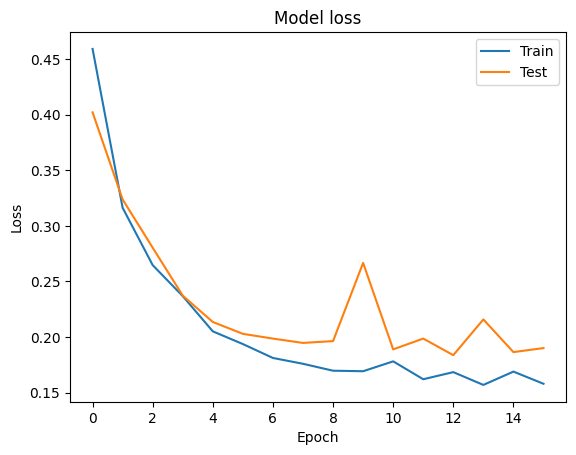

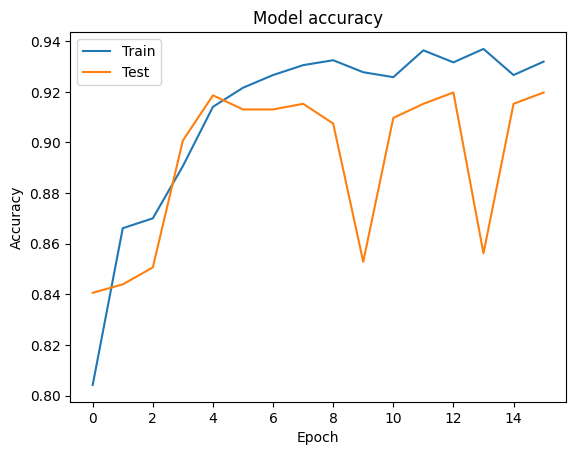

In [339]:
# loss plot function
def plot_loss(loss,val_loss):
    plt.figure()
    plt.plot(loss)
    plt.plot(val_loss)
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper right')  
    plt.show()
    
# accuracy plot function    
def plot_accuracy(acc,val_acc):
    plt.figure()
    plt.plot(acc)
    plt.plot(val_acc)
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

# plot loss and accuracy curves
plot_loss(history.history['loss'], history.history['val_loss'])
plot_accuracy(history.history['accuracy'], history.history['val_accuracy'])